- About this Dataset
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

In [144]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [145]:
raw_df = pd.read_csv("Housing.csv")
raw_df.describe(include = 'all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


### Handling missing values

In [146]:
def null_summary(df):
    total = df.shape[0] # no. of rows
    missing_info = df.isnull().sum() / total * 100
    # return a series that contains the count for missing values for each column
    # percentage is calculated and stored instead of count due to "/total*100"
    missing_info = missing_info[missing_info > 0]
    # select the column containing missing values
    
    for col, per in missing_info.items():
        print(f"{col} : {int(df[col].isnull().sum())} ({per:.3f}%)")
    return missing_info

null_info = null_summary(raw_df)
# column_name : no_of_null (percent_of_null_values)

total_bedrooms : 207 (1.003%)


null values of about 1 %, so we decide to delete those records

In [147]:
df = raw_df.dropna()
df.describe(include = 'all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9034
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,NaN
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,NaN
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,NaN


To check Presence of any non significant column

In [148]:
columns = [df.columns[i] for i in range(2,8)]
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
x = df[columns]
y= df['median_house_value']

f_regression(x,y)
reg = LinearRegression()
reg.fit(x,y)
p_values = f_regression(x,y)[1]

reg_summary = pd.DataFrame(data = x.columns.values, columns=['Features'])
reg_summary ['Coefficients'] = reg.coef_
reg_summary ['p-values'] = p_values.round(3)
reg_summary

,Features,Coefficients,p-values
0,housing_median_age,1882.121429,0.0
1,total_rooms,-19.733115,0.0
2,total_bedrooms,100.943796,0.0
3,population,-35.319022,0.0
4,households,124.803173,0.0
5,median_income,47748.380835,0.0


All are significant columns

Now we check for graphs of column iteratively, so get any insight

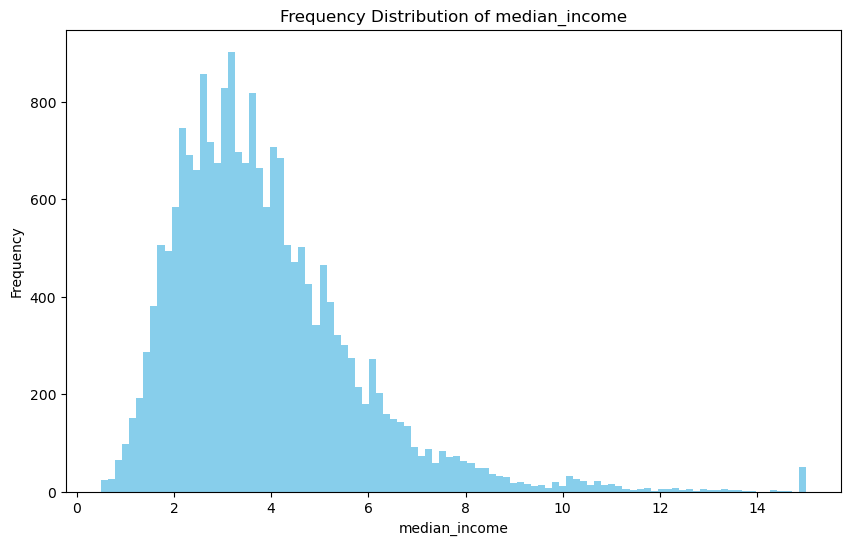

In [149]:
columns = [df.columns[i] for i in range(2,8)]

column_index = 5 # change for each column

value_counts = df[columns[column_index]].value_counts()
# Create a bar plot for the frequency distribution
plt.figure(figsize=(10, 6))  # You can adjust the figure size
plt.hist(df[columns[column_index]], bins=100, color='skyblue')
plt.title('Frequency Distribution of ' + columns[column_index])
plt.xlabel(columns[column_index])
plt.ylabel('Frequency')

plt.show()

After checking for all the graphs, all are within accepted region

### Standardization 

In [150]:
from sklearn import preprocessing

# Specify the column names you want to exclude
columns_to_exclude = ['ocean_proximity', 'median_house_value']
# Get the remaining column names
columns_to_normalize = list(set(df.columns) - set(columns_to_exclude))

scaler= preprocessing.StandardScaler()
df.loc[:, columns_to_normalize] = scaler.fit_transform(df.loc[:, columns_to_normalize])
df.describe(include = 'all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,2.043300e+04,2.043300e+04,2.043300e+04,2.043300e+04,2.043300e+04,2.043300e+04,2.043300e+04,2.043300e+04,20433.000000,20433
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9034
mean,-8.457103e-16,1.535632e-15,5.007495e-17,-3.407879e-17,-7.233049e-17,-8.067632e-17,-6.676661e-17,2.948858e-16,206864.413155,NaN
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,115435.667099,NaN
min,-2.385447e+00,-1.447937e+00,-2.194584e+00,-1.205604e+00,-1.274093e+00,-1.254828e+00,-1.303810e+00,-1.775054e+00,14999.000000,NaN
25%,-1.112692e+00,-7.972780e-01,-8.444662e-01,-5.429688e-01,-5.740034e-01,-5.629702e-01,-5.739976e-01,-6.884113e-01,119500.000000,NaN
50%,5.393926e-01,-6.428050e-01,2.913923e-02,-2.331597e-01,-2.441308e-01,-2.285134e-01,-2.365573e-01,-1.762077e-01,179700.000000,NaN
75%,7.789699e-01,9.768213e-01,6.644886e-01,2.317829e-01,2.589843e-01,2.621409e-01,2.735268e-01,4.595713e-01,264700.000000,NaN


### Dealing with categorical data

In [151]:
unique_values = df['ocean_proximity'].unique()
unique_values

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [152]:
df = pd.get_dummies(df , columns = ['ocean_proximity'])

### Split the data 

In [153]:
inputs = df.iloc[:,df.columns != 'median_house_value'].to_numpy()
outputs = df['median_house_value'].to_numpy()
from sklearn.model_selection import train_test_split

train_inputs, test_inputs, train_targets, test_targets = train_test_split(inputs,outputs,random_state =42)


### Save the Data 

In [154]:
np.savez('housing_training_data', inputs = train_inputs, targets = train_targets)
np.savez('housing_test_data', inputs = test_inputs, targets = test_targets)